Courant Number (<.5): 0.25


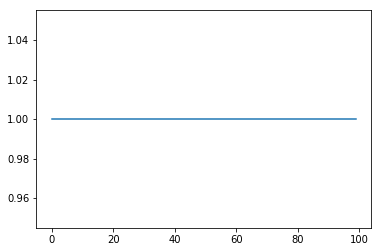

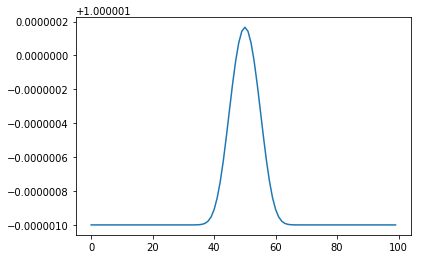

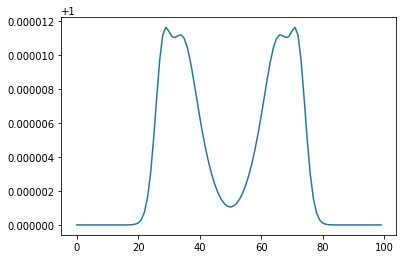

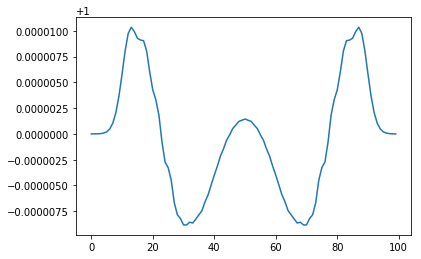

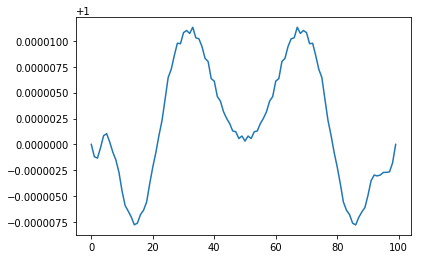

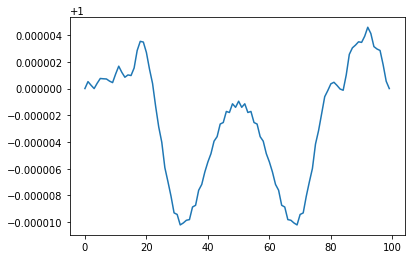

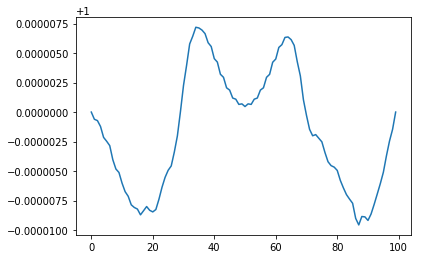

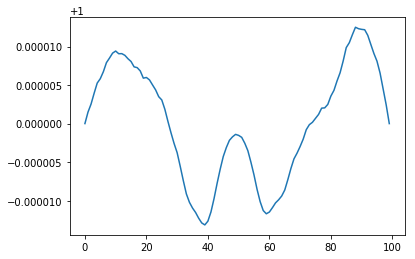

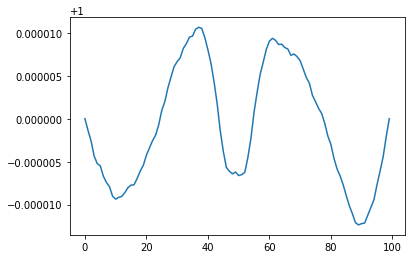

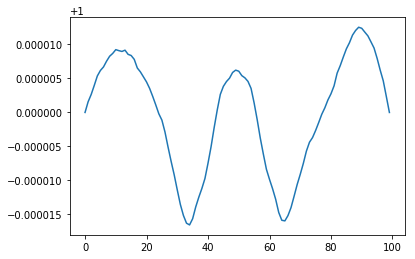

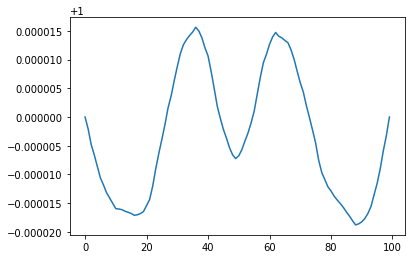

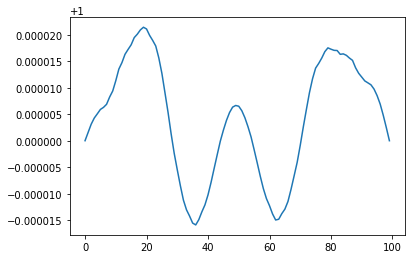

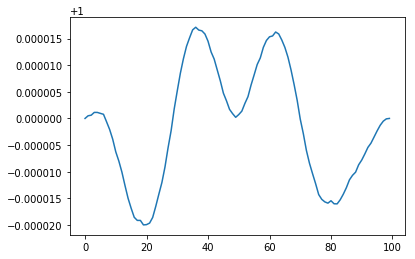

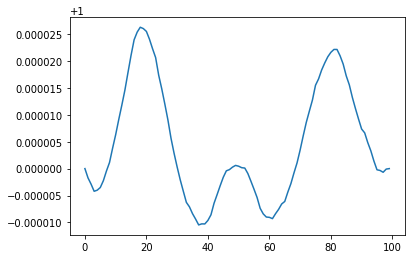

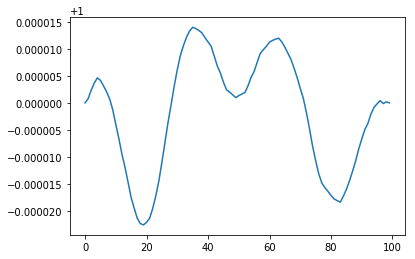

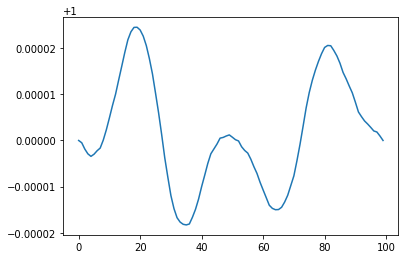

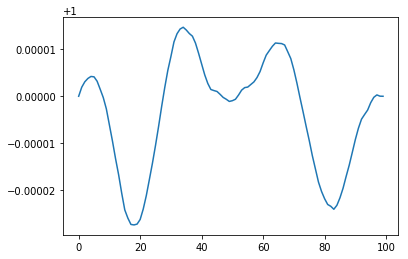

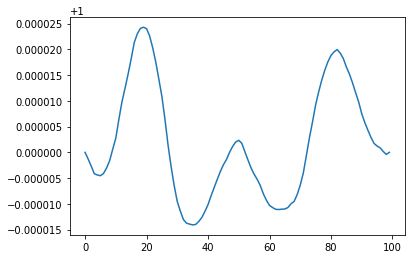

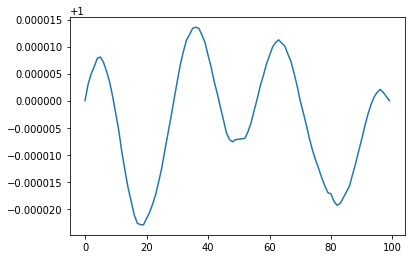

In [21]:
import numpy as np
import matplotlib.pyplot as plt
NX = 100
NY = 100
DT = .0025
NT = 1000
p = np.ones([NT, NX, NY])
f = np.zeros([NT, NX, NY])
w = 10.0
f[:,25,50] = 1.0*np.sin(w * 2.0*np.pi*np.linspace(0,NT,NT) / NT)
f[:,75,50] = 1.0*np.cos(w * 2.0*np.pi*np.linspace(0,NT,NT) / NT)
DX = 1.0 / NX
DY = 1.0 / NY
c = 1
#p[0,:,50] = 1.0 + .01
print 'Courant Number (<.5): ' + str( c * DT / DX)


t = 0
for i in range(1,NX-1):
    for j in range(1,NY-1):
        p[t+1,i,j] = (1.0/2.0) *( (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j+1] + p[t,i-1,j] + p[t,i+1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] )

for t in range(2,NT-1):
    
    #Dirichlet
    if 1:
        p[t+1,0,:] = 1.0
        p[t+1,NX-1,:] = 1.0
        p[t+1,:,0] = 1.0
        p[t+1,:,NY-1] = 1.0
        
                
    if t % 50 == 0:
        plt.figure()
        plt.plot( p[t,50,:])
        plt.show()
            
    for i in range(1,NX-1):
        for j in range(1,NY-1):
            p[t+1,i,j] = (DT*DT*c*c/(DX*DX))*( p[t,i,j-1] + p[t,i,j+1] + p[t,i-1,j] + p[t,i+1,j] - 4.0*p[t,i,j] ) +  DT*DT*f[t,i,j] + 2.0*p[t,i,j] - p[t-1,i,j]


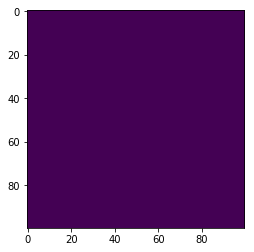

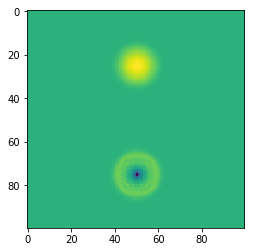

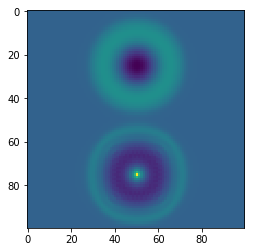

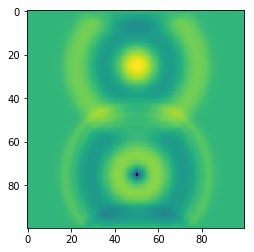

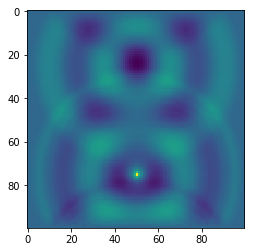

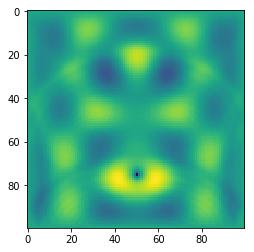

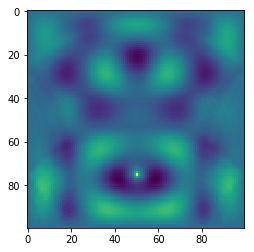

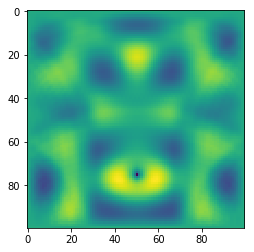

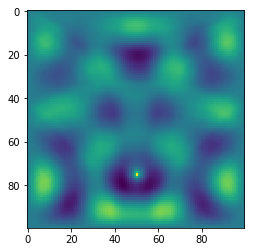

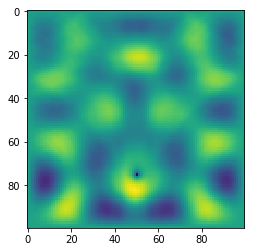

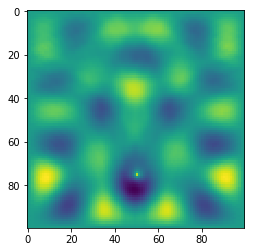

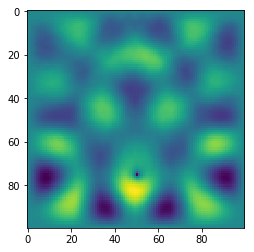

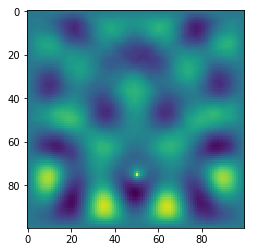

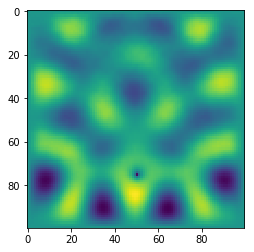

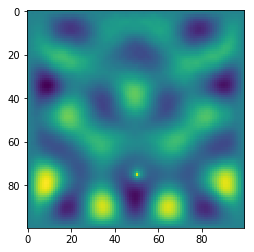

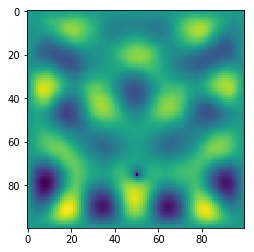

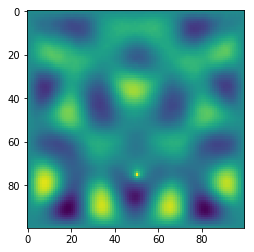

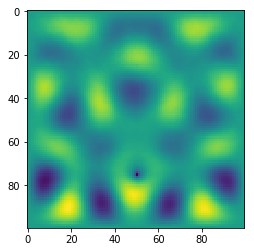

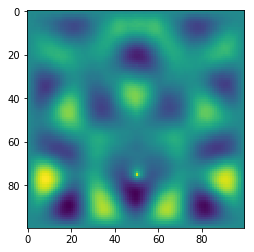

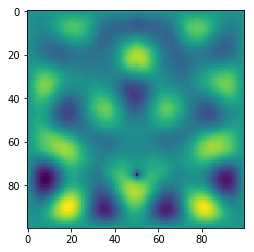

In [22]:
for t in range(0,NT,50):
    plt.figure()
    plt.imshow( p[t,:,:] )
    plt.show()